In [1]:
#Blob Based Feature Detection:
#Iteration Type: HoG + LBF

In [2]:
import tensorflow

In [3]:
from PIL import Image
import numpy as np

In [34]:
from skimage.feature import hog, local_binary_pattern, multiblock_lbp
from skimage.feature import draw_multiblock_lbp
import cv2
import matplotlib.pyplot as plt

In [5]:
#Importing Images!
img = cv2.imread("98.jpg")
img_grey = np.array(Image.open("98.jpg").convert('LA'))
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [67]:
# img_r = img_color[:, :, 0]
# img_g = img_color[:, :, 1]
# img_b = img_color[:, :, 2]


In [6]:
type(img_color)


numpy.ndarray

In [7]:
#Splitting into channels!
img_color = tensorflow.image.resize(img_color, (256,256),preserve_aspect_ratio=False).numpy()
img_r = np.reshape(img_color[:, :, 0], (256,256))
img_g = np.reshape(img_color[:, :, 1], (256,256))
img_b = np.reshape(img_color[:, :, 2], (256,256))

img_grey = tensorflow.image.resize(img_grey, (256,256),preserve_aspect_ratio=False).numpy()
img_grey = np.reshape(img_grey[:, :, 0], newshape=(256,256))

img_hsv = tensorflow.image.resize(img_hsv, (256,256),preserve_aspect_ratio=False).numpy()
img_h = np.reshape(img_hsv[:, :, 0], (256,256))
img_s = np.reshape(img_hsv[:, :, 1], (256,256))
img_v = np.reshape(img_hsv[:, :, 2], (256,256))



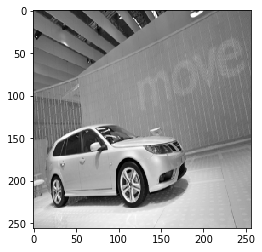

In [18]:
plt.imshow(img_grey, cmap = 'gray')

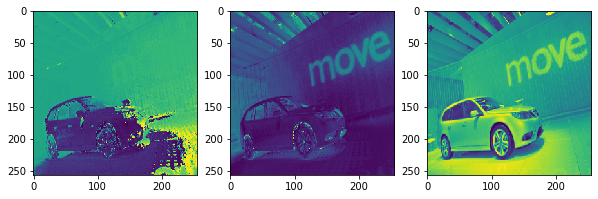

In [15]:
#HSV Visualization
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img_h)
plt.subplot(132)
plt.imshow(img_s)
plt.subplot(133)
plt.imshow(img_v)

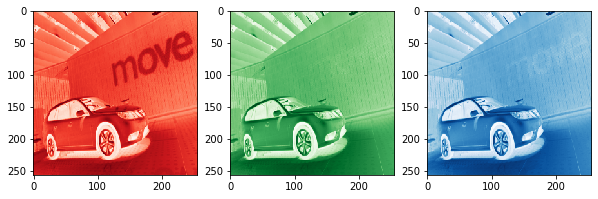

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img_r, cmap =  'Reds')
plt.subplot(132)
plt.imshow(img_g, cmap = 'Greens')
plt.subplot(133)
plt.imshow(img_b, cmap = 'Blues')

#Extracting infor from hoG!
winSize = (16,16)
blockSize = (8,8)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
hog_cv = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
h_img = hog.compute(img)
print(h_img.shape)

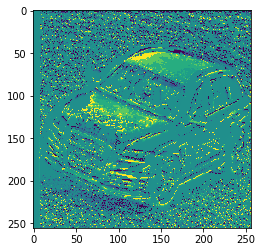

In [19]:
#LBP for Gray
radius = 8 #Optimized!
n_points = 8 * radius
lbp_grey_16 = local_binary_pattern(img_grey, n_points, radius)
plt.imshow(lbp_grey_16)

In [43]:
lbp_grey_16.shape

(256, 256)

In [10]:
img_grey.shape

(256, 256)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


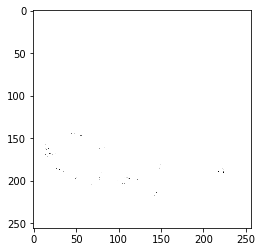

In [43]:
#Using Multi-block LBP!
lbp_grey_16 = multiblock_lbp(img_grey, r= 0, c = 0, width=16, height = 16)
lbp_grey_16
plt.imshow(draw_multiblock_lbp(img_grey, 0, 0, 16, 16, lbp_code=lbp_grey_16))


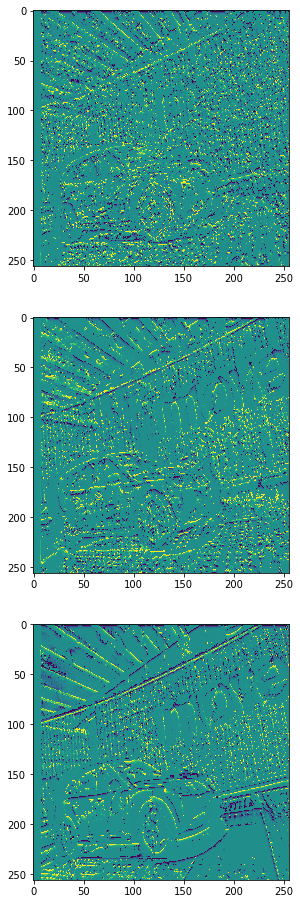

In [33]:
#LBP for HSV Color Space
plt.figure(figsize=(16,16))
radius = 8 #Optimized!
n_points = 8 * radius
lbp_h = local_binary_pattern(img_h, n_points, radius)
plt.subplot(311)
plt.imshow(lbp_h)

lbp_s = local_binary_pattern(img_s, n_points, radius)
plt.subplot(312)
plt.imshow(lbp_s)

lbp_v = local_binary_pattern(img_v, n_points, radius)
plt.subplot(313)
plt.imshow(lbp_v)

In [49]:
n_bins = int(lbp_v.max() + 1)
plt.hist(lbp_v.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5')

In [48]:
np.shape(lbp_b.ravel())

(65536,)

Text(0.5, 1.0, 'Blue-LBP')

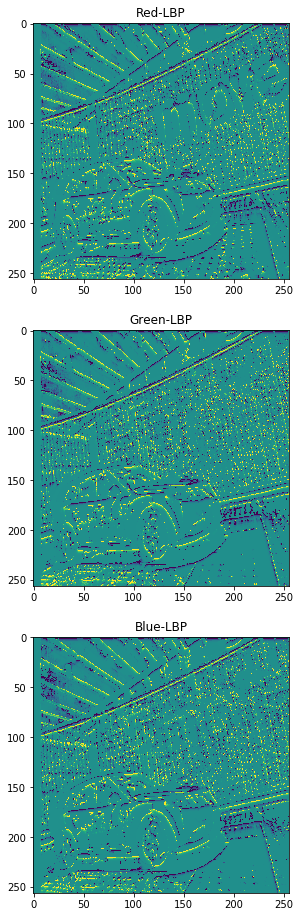

In [39]:
plt.figure(figsize=(16,16))
radius = 8 #Optimized!
n_points = 8 * radius
lbp_r = local_binary_pattern(img_r, n_points, radius)
plt.subplot(311)
plt.imshow(lbp_r)
plt.title("Red-LBP")

lbp_g = local_binary_pattern(img_g, n_points, radius)
plt.subplot(312)
plt.imshow(lbp_g)
plt.title("Green-LBP")


lbp_b = local_binary_pattern(img_b, n_points, radius)
plt.subplot(313)
plt.imshow(lbp_b)
plt.title("Blue-LBP")

Text(0.5, 1.0, 'HSV - LBP')

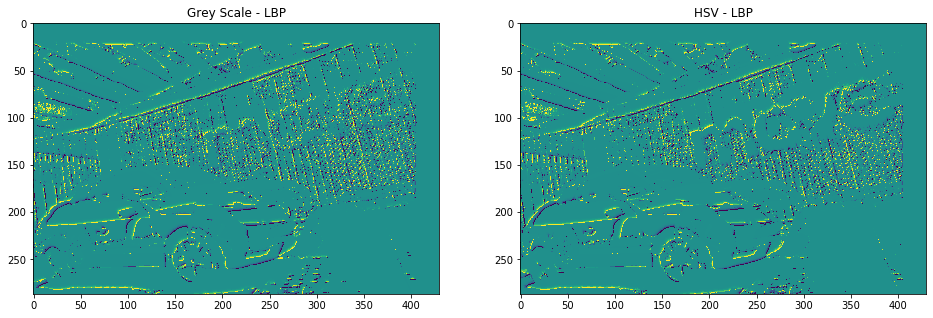

In [60]:
#Comparing LBP for HSV, Grey_PIL
radius = 32
n_points = 8 * radius
lbp_grey = local_binary_pattern(img_grey, n_points, radius)
lbp_hsv = local_binary_pattern(img_HSV[:, :, -1], n_points, radius)
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(lbp_grey)
plt.title("Grey Scale - LBP")
plt.subplot(122)
plt.imshow(lbp_hsv)
plt.title("HSV - LBP")

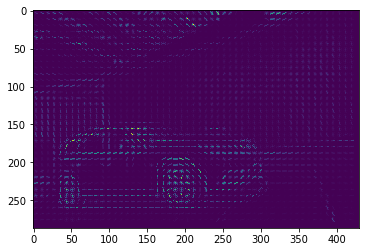

In [10]:
fd_gray, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

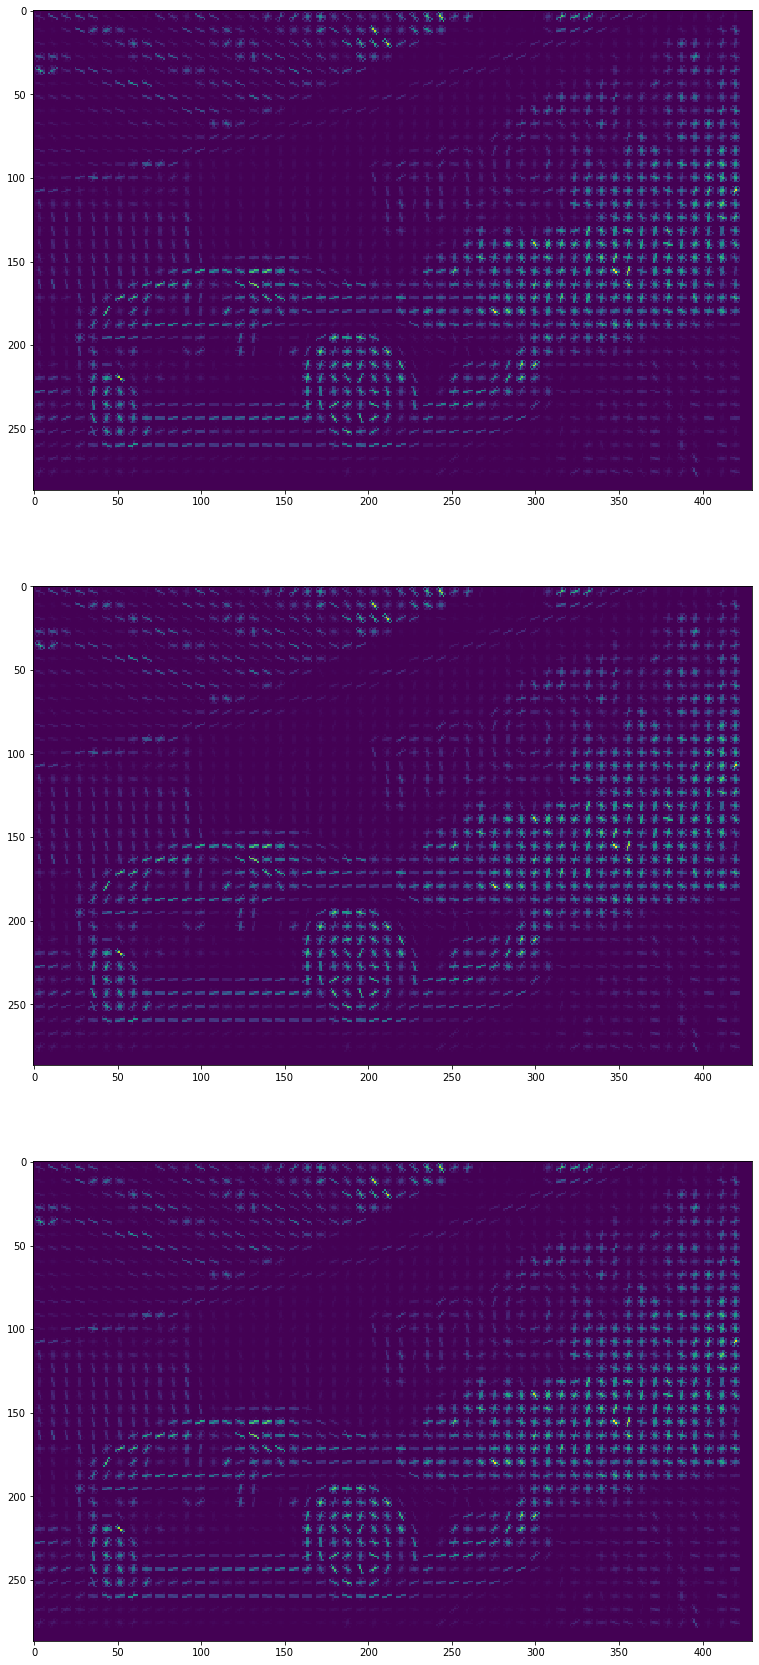

In [64]:
#HOG For Grey Scale, Color and HSV!
plt.figure(figsize = (30, 30))
plt.subplot(311)
_, hog_grey = hog(img_grey, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

plt.subplot(312)
_, hog_grey = hog(img_color, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

plt.subplot(313)
_, hog_grey = hog(img_hsv, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)


In [ ]:
#Compare HoG for HSV, RBG and Gray!

In [65]:
fd.shape

(14840,)

In [66]:
img_HSV.shape

(287, 430, 3)

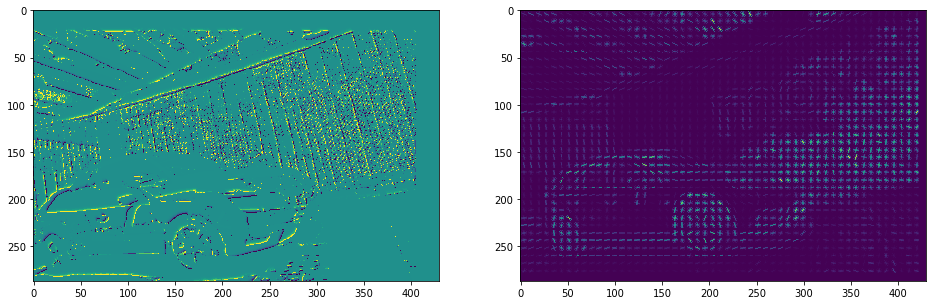

In [14]:
#Using HSV Image Information for LBF + HoG
plt.figure(figsize = (16,16))
plt.subplot(121)
radius = 32
n_points = 8 * radius
lbp_image = local_binary_pattern(img_HSV[:,:, -1], n_points, radius)
plt.imshow(lbp)
plt.subplot(122)
fd, lbp_hog = hog(lbp_image, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

#Cascading doesn't yield good results!

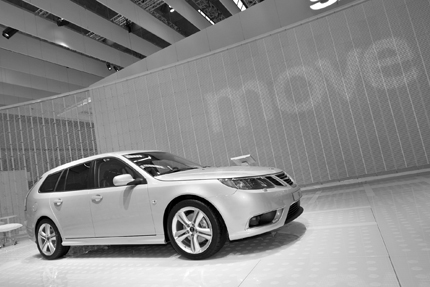

In [27]:
img_grey

In [26]:
# #Using Grey Image Information for LBF + HoG

# plt.figure(figsize = (16,16))
# plt.subplot(121)
# radius = 32
# n_points = 8 * radius
# lbp_image = local_binary_pattern(img_grey, n_points, radius)
# plt.imshow(lbp)
# plt.subplot(122)
# fd, lbp_hog = hog(lbp_image, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
# plt.imshow(hog_image)


ValueError: The parameter `image` must be a 2-dimensional array

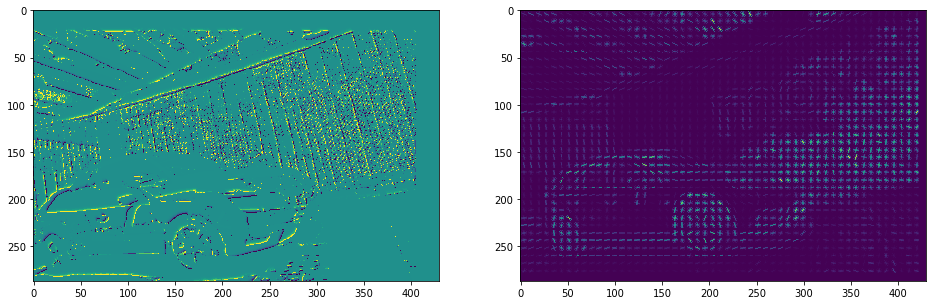

In [15]:
#Using HSV Image Information for LBF and HoG separately
plt.figure(figsize = (16,16))
plt.subplot(121)
radius = 32
n_points = 8 * radius
lbp_image = local_binary_pattern(img_HSV[:,:, -1], n_points, radius)
plt.imshow(lbp)
plt.subplot(122)
fd, lbp_hog = hog(img_HSV[:,:, -1], orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

#Cascading doesn't yield good results!

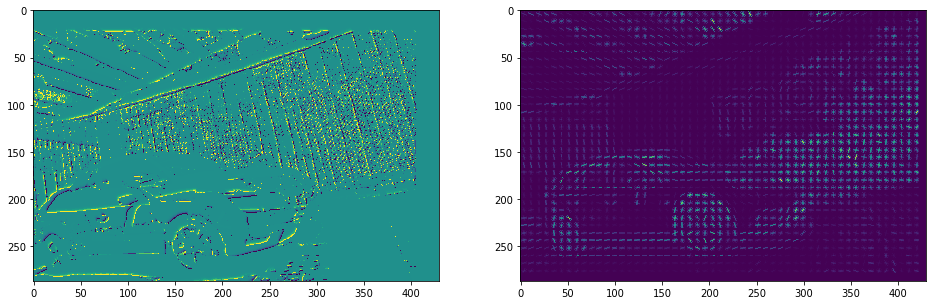

In [19]:
#Using Grayscale Image Information for LBF and HoG separately
plt.figure(figsize = (16,16))
plt.subplot(121)
radius = 32
n_points = 8 * radius
lbp_image = local_binary_pattern(img_gray, n_points, radius)
plt.imshow(lbp)
plt.subplot(122)
fd, lbp_hog = hog(img_gray, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)

#Cascading doesn't yield good results!

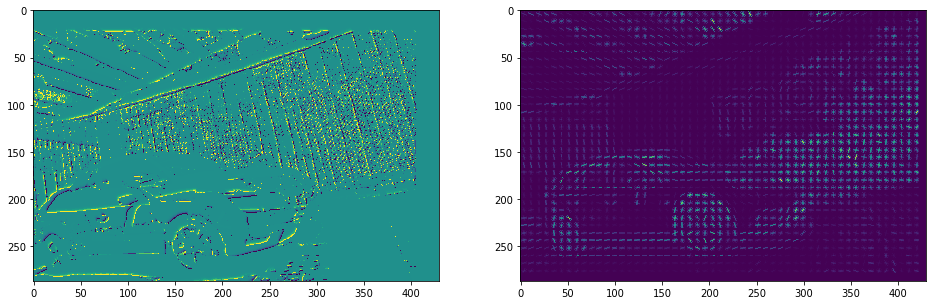

In [17]:
plt.figure(figsize = (16,16))
plt.subplot(121)
radius = 32
n_points = 8 * radius
lbp_image = local_binary_pattern(hog_image, n_points, radius)
plt.imshow(lbp)
plt.subplot(122)
fd, lbp_hog = hog(lbp_image, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_image)